# ONT Confidane score - Plot browser - no Threshold_mC
## T cells mapped to T2T version 2.0
## Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Modify the window of the input size

In [23]:
import sys
from pathlib import Path
from datetime import datetime 

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated,
    mod_vectors_noThreshold_analyze
    # main,
)

In [24]:
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

In [25]:
threshold_mC = None # 0.7 #  0.9 #0.99

system_info()

experiment_name = "ThrNone_K562_ZFPOFFpostSort_LOW70_NoFullyUnmethylated_T2Tv2" 
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
#  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

# Make sure to use UpperCase fasta in the Reference genome, so that the mapping of the sequence is got giving erorrs
# awk '{if ($0 ~ /^>/) print $0; else print toupper($0)}' /home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa > /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
# samtools faidx /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
# '/home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa')
reg_genome_version = "t2t_v2_0"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'

# Expend window size
expand_window_size = 50 # 50 #500 #1500 # 0 
expand_window_size
print("Expend window size by 2 * ", expand_window_size)
region_start = 206586162 - expand_window_size
region_end = 206586192 + expand_window_size + 1

# # 30 bps:
# region_start = 206586162
# region_end = 206586192

# # FULL 7 KB WINDOW: 1:206583000-206590000
# region_start = 206583000   # 206586162
# region_end = 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

print('region_chr', region_chr)
print('region_start', region_start)
print('region_end', region_end)
print(f'{region_chr}:{region_start}-{region_end}')

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
Expend window size by 2 *  50
region_length 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243


In [4]:
# threshold_mC = None # 0 # 0.7 # 0.9 #0.99

extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name, 
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

Region length: 131
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3530 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3530   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_131bps_ThrNone_K562_ZFPOFFpostSort_LOW70_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206586112-206586243.html


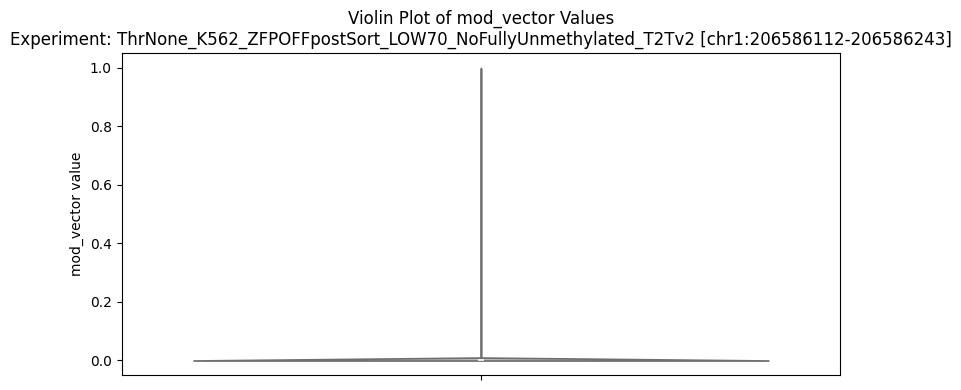

Bin 1: Range [0.0020, 0.0219) - Percentage: 58.72%
Bin 2: Range [0.0219, 0.0418) - Percentage: 6.52%
Bin 3: Range [0.0418, 0.0617) - Percentage: 3.78%
Bin 4: Range [0.0617, 0.0817) - Percentage: 2.52%
Bin 5: Range [0.0817, 0.1016) - Percentage: 1.95%
Bin 6: Range [0.1016, 0.1215) - Percentage: 1.49%
Bin 7: Range [0.1215, 0.1415) - Percentage: 1.20%
Bin 8: Range [0.1415, 0.1614) - Percentage: 1.00%
Bin 9: Range [0.1614, 0.1813) - Percentage: 1.00%
Bin 10: Range [0.1813, 0.2012) - Percentage: 0.89%
Bin 11: Range [0.2012, 0.2212) - Percentage: 1.00%
Bin 12: Range [0.2212, 0.2411) - Percentage: 0.67%
Bin 13: Range [0.2411, 0.2610) - Percentage: 0.61%
Bin 14: Range [0.2610, 0.2810) - Percentage: 0.54%
Bin 15: Range [0.2810, 0.3008) - Percentage: 0.54%
Bin 16: Range [0.3008, 0.3208) - Percentage: 0.51%
Bin 17: Range [0.3208, 0.3408) - Percentage: 0.52%
Bin 18: Range [0.3408, 0.3606) - Percentage: 0.45%
Bin 19: Range [0.3606, 0.3806) - Percentage: 0.42%
Bin 20: Range [0.3806, 0.4004) - Percen

([('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype=float16),
   'CG,0',
   np.int32(206589913),
   '3979a1bd-4ea5-4b90-a845-821d2b3299fa',
   np.int32(206567492),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.1208767361111111)),
  ('chr1',
   array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.001953],
         dtype=float16),
   'CG,0',
   np.int32(206589932),
   'f666b89d-d6fa-4f70-8c2e-d1a92473309f',
   np.int32(206578366),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.1875)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.5527], dtype=float16),
   'CG,0',
   np.int32(206589934),
   '559d43b3-295b-419d-bad5-ad58ecf02c7b',
   np.int32(206581109),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.755859375)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype=float

In [5]:
num_bins = 50
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs,
    num_bins
    )

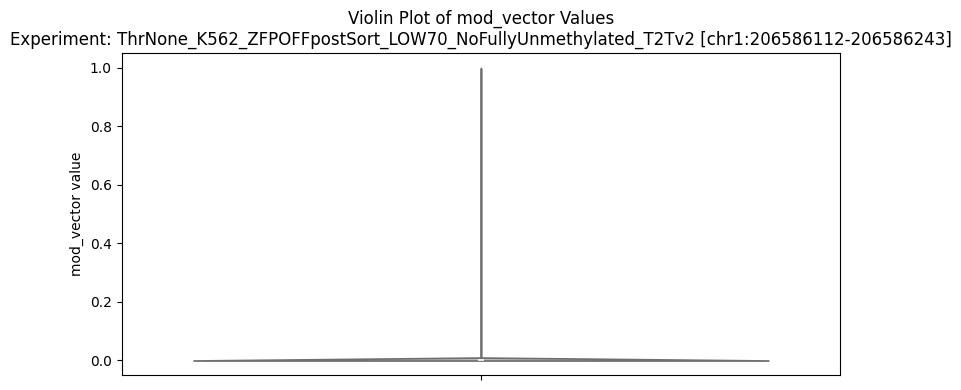

Bin 1: Range [0.0020, 0.0642) - Percentage: 69.01%
Bin 2: Range [0.0642, 0.1265) - Percentage: 6.20%
Bin 3: Range [0.1265, 0.1887) - Percentage: 3.33%
Bin 4: Range [0.1887, 0.2510) - Percentage: 2.43%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.74%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.51%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.29%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.17%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.01%
Bin 10: Range [0.5625, 0.6245) - Percentage: 1.01%
Bin 11: Range [0.6245, 0.6865) - Percentage: 0.95%
Bin 12: Range [0.6865, 0.7490) - Percentage: 1.01%
Bin 13: Range [0.7490, 0.8115) - Percentage: 0.96%
Bin 14: Range [0.8115, 0.8735) - Percentage: 0.93%
Bin 15: Range [0.8735, 0.9355) - Percentage: 1.22%
Bin 16: Range [0.9355, 0.9980) - Percentage: 6.23%


([('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype=float16),
   'CG,0',
   np.int32(206589913),
   '3979a1bd-4ea5-4b90-a845-821d2b3299fa',
   np.int32(206567492),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.1208767361111111)),
  ('chr1',
   array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.001953],
         dtype=float16),
   'CG,0',
   np.int32(206589932),
   'f666b89d-d6fa-4f70-8c2e-d1a92473309f',
   np.int32(206578366),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.1875)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.5527], dtype=float16),
   'CG,0',
   np.int32(206589934),
   '559d43b3-295b-419d-bad5-ad58ecf02c7b',
   np.int32(206581109),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.755859375)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype=float

In [6]:
num_bins = 16
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs,
    num_bins
    )

In [7]:
extract_file

PosixPath('dimelo_v2_output/extracted_reads/reads.combined_basemods.h5')

region_length 7000
Region length: 7000
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3998 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3998   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_7000bps_ThrNone_K562_ZFPOFFpostSort_LOW70_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206583000-206590000.html


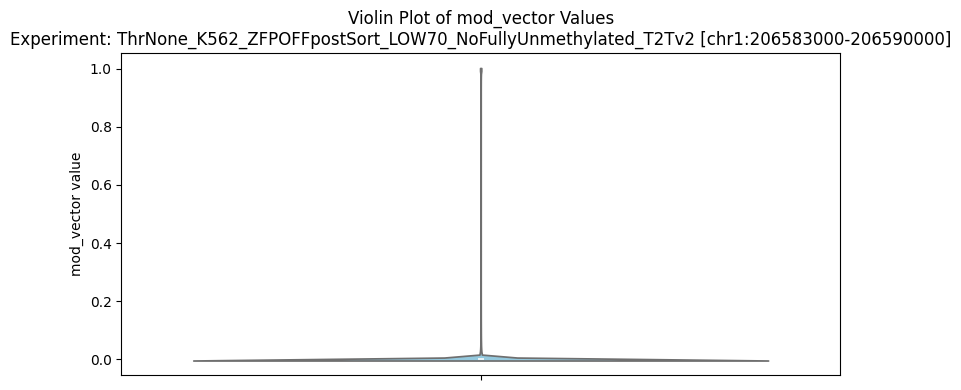

Bin 1: Range [0.0020, 0.0642) - Percentage: 61.38%
Bin 2: Range [0.0642, 0.1265) - Percentage: 4.94%
Bin 3: Range [0.1265, 0.1887) - Percentage: 2.67%
Bin 4: Range [0.1887, 0.2510) - Percentage: 1.87%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.40%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.20%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.06%
Bin 8: Range [0.4377, 0.5000) - Percentage: 0.95%
Bin 9: Range [0.5000, 0.5625) - Percentage: 0.93%
Bin 10: Range [0.5625, 0.6245) - Percentage: 0.90%
Bin 11: Range [0.6245, 0.6865) - Percentage: 0.89%
Bin 12: Range [0.6865, 0.7490) - Percentage: 0.89%
Bin 13: Range [0.7490, 0.8115) - Percentage: 0.96%
Bin 14: Range [0.8115, 0.8735) - Percentage: 1.09%
Bin 15: Range [0.8735, 0.9355) - Percentage: 1.45%
Bin 16: Range [0.9355, 0.9980) - Percentage: 17.42%


([('chr1',
   array([0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.00586],
         dtype=float16),
   'CG,0',
   np.int32(206589911),
   '3979a1bd-4ea5-4b90-a845-821d2b3299fa',
   np.int32(206567490),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206583000,
   206590000,
   '.',
   np.float64(0.13482862903225806)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype=float16),
   'CG,0',
   np.int32(206589893),
   'f666b89d-d6fa-4f70-8c2e-d1a92473309f',
   np.int32(206578327),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206583000,
   206590000,
   '.',
   np.float64(0.19813012295081966)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.9785], dtype=float16),
   'CG,0',
   np.int32(206589919),
   '559d43b3-295b-419d-bad5-ad58ecf02c7b',
   np.int32(206581094),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206583000,
   206590000,
   '.',
   np.float64(0.628707627118644)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998

In [8]:
# threshold_mC = None # 0 # 0.7 # 0.9 #0.99

region_chr = 'chr1'
# # 30 bps:
# region_start = 206586162
# region_end = 206586192

# FULL 7 KB WINDOW: 1:206583000-206590000
region_start = 206583000   # 206586162
region_end = 206590000 # 20658619


region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

In [9]:
extract_file, extract_regions

(PosixPath('dimelo_v2_output/extracted_reads/reads.combined_basemods.h5'),
 PosixPath('dimelo_v2_output/extracted_reads/regions.processed.bed'))

In [10]:
keep_unmethylated_reads = False

if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# if extract_file:
#     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#     visualize_data(reads_df)

#     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

Error processing extracted reads: No threshold has been applied to this .h5 single read data. You must provide a threshold using the thresh parameter in order to extract binarized modification arrays.
Error in visualization: 'NoneType' object has no attribute 'copy'
Error creating padded reads matrix: 'NoneType' object is not subscriptable


In [28]:
206586700 - 206586400

300

region_length 300
Region length: 300
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3559 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3559   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_300bps_ThrNone_K562_ZFPOFFpostSort_LOW70_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206586400-206586700.html


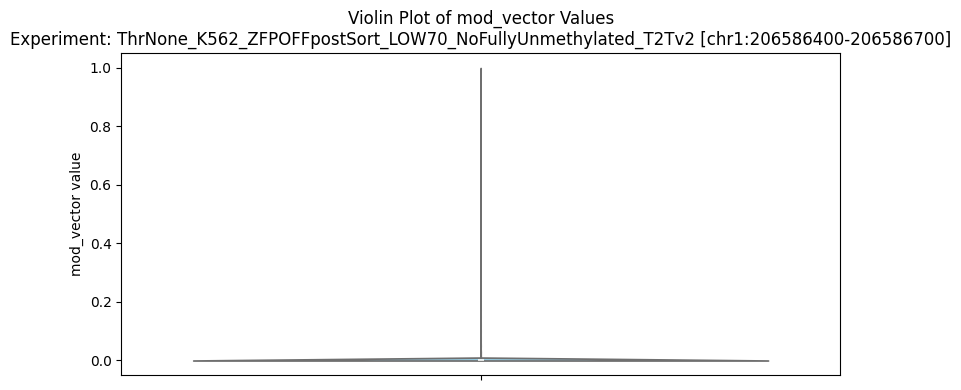

Bin 1: Range [0.0020, 0.0642) - Percentage: 74.00%
Bin 2: Range [0.0642, 0.1265) - Percentage: 5.66%
Bin 3: Range [0.1265, 0.1887) - Percentage: 2.98%
Bin 4: Range [0.1887, 0.2510) - Percentage: 2.10%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.61%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.25%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.16%
Bin 8: Range [0.4377, 0.5000) - Percentage: 0.93%
Bin 9: Range [0.5000, 0.5625) - Percentage: 0.90%
Bin 10: Range [0.5625, 0.6245) - Percentage: 0.88%
Bin 11: Range [0.6245, 0.6865) - Percentage: 0.83%
Bin 12: Range [0.6865, 0.7490) - Percentage: 0.77%
Bin 13: Range [0.7490, 0.8115) - Percentage: 0.80%
Bin 14: Range [0.8115, 0.8735) - Percentage: 0.85%
Bin 15: Range [0.8735, 0.9355) - Percentage: 0.94%
Bin 16: Range [0.9355, 0.9980) - Percentage: 4.34%


([('chr1',
   array([0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.00586],
         dtype=float16),
   'CG,0',
   np.int32(206589924),
   '3979a1bd-4ea5-4b90-a845-821d2b3299fa',
   np.int32(206567503),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586700,
   '.',
   np.float64(0.021254595588235295)),
  ('chr1',
   array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.001953],
         dtype=float16),
   'CG,0',
   np.int32(206589947),
   'f666b89d-d6fa-4f70-8c2e-d1a92473309f',
   np.int32(206578381),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586700,
   '.',
   np.float64(0.0115234375)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.3887], dtype=float16),
   'CG,0',
   np.int32(206589944),
   '559d43b3-295b-419d-bad5-ad58ecf02c7b',
   np.int32(206581119),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586700,
   '.',
   np.float64(0.60546875)),
  ('chr1',
   array([0.      , 0.      , 0.      , .

In [29]:
# Region length: 300 - TSS
region_start = 206586400 # 206583000   # 206586162
region_end = 206586700 # 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

region_length 2200
Region length: 2200
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3662 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3662   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_2200bps_ThrNone_K562_ZFPOFFpostSort_LOW70_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206585400-206587600.html


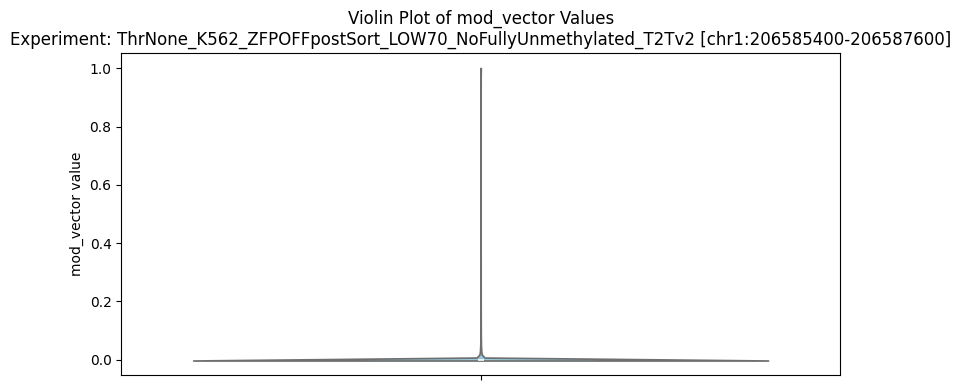

Bin 1: Range [0.0020, 0.0642) - Percentage: 71.50%
Bin 2: Range [0.0642, 0.1265) - Percentage: 5.82%
Bin 3: Range [0.1265, 0.1887) - Percentage: 3.11%
Bin 4: Range [0.1887, 0.2510) - Percentage: 2.17%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.60%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.35%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.17%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.03%
Bin 9: Range [0.5000, 0.5625) - Percentage: 0.97%
Bin 10: Range [0.5625, 0.6245) - Percentage: 0.91%
Bin 11: Range [0.6245, 0.6865) - Percentage: 0.89%
Bin 12: Range [0.6865, 0.7490) - Percentage: 0.84%
Bin 13: Range [0.7490, 0.8115) - Percentage: 0.85%
Bin 14: Range [0.8115, 0.8735) - Percentage: 0.90%
Bin 15: Range [0.8735, 0.9355) - Percentage: 1.02%
Bin 16: Range [0.9355, 0.9980) - Percentage: 5.88%


([('chr1',
   array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.001953],
         dtype=float16),
   'CG,0',
   np.int32(206589915),
   '3979a1bd-4ea5-4b90-a845-821d2b3299fa',
   np.int32(206567494),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206585400,
   206587600,
   '.',
   np.float64(0.053862847222222225)),
  ('chr1',
   array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.001953],
         dtype=float16),
   'CG,0',
   np.int32(206589930),
   'f666b89d-d6fa-4f70-8c2e-d1a92473309f',
   np.int32(206578364),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206585400,
   206587600,
   '.',
   np.float64(0.062032948369565216)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.0801], dtype=float16),
   'CG,0',
   np.int32(206589935),
   '559d43b3-295b-419d-bad5-ad58ecf02c7b',
   np.int32(206581110),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206585400,
   206587600,
   '.',
   np.float64(0.6125710227272727)),
  ('chr1',
   array([0.   , 0.

In [15]:
# Region length: 2200 near TSS 
region_start = 206585400 # 206583000   # 206586162
region_end = 206587600 # 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

region_length 310
Region length: 310
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3623 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3623   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_310bps_ThrNone_K562_ZFPOFFpostSort_LOW70_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206584106-206584416.html


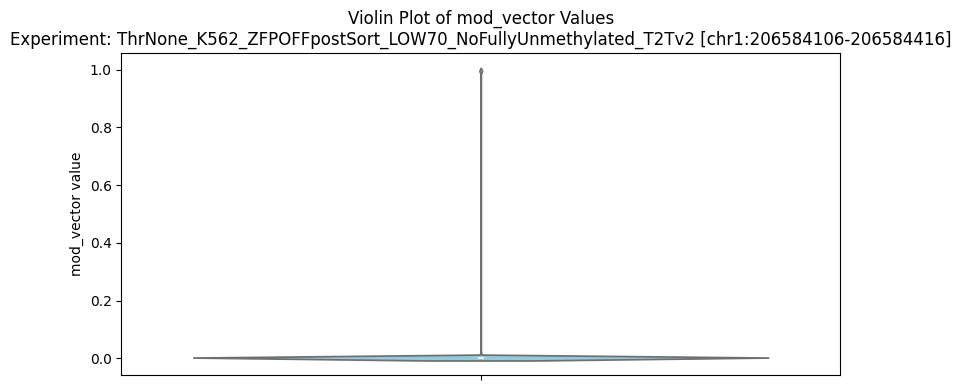

Bin 1: Range [0.0020, 0.0642) - Percentage: 9.49%
Bin 2: Range [0.0642, 0.1265) - Percentage: 1.16%
Bin 3: Range [0.1265, 0.1887) - Percentage: 0.87%
Bin 4: Range [0.1887, 0.2510) - Percentage: 0.76%
Bin 5: Range [0.2510, 0.3132) - Percentage: 0.76%
Bin 6: Range [0.3132, 0.3755) - Percentage: 0.76%
Bin 7: Range [0.3755, 0.4377) - Percentage: 0.84%
Bin 8: Range [0.4377, 0.5000) - Percentage: 0.84%
Bin 9: Range [0.5000, 0.5625) - Percentage: 0.99%
Bin 10: Range [0.5625, 0.6245) - Percentage: 1.07%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.19%
Bin 12: Range [0.6865, 0.7490) - Percentage: 1.55%
Bin 13: Range [0.7490, 0.8115) - Percentage: 1.79%
Bin 14: Range [0.8115, 0.8735) - Percentage: 2.59%
Bin 15: Range [0.8735, 0.9355) - Percentage: 4.17%
Bin 16: Range [0.9355, 0.9980) - Percentage: 71.18%


([('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype=float16),
   'CG,0',
   np.int32(206589920),
   '3979a1bd-4ea5-4b90-a845-821d2b3299fa',
   np.int32(206567499),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206584106,
   206584416,
   '.',
   np.float64(0.64296875)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.9824], dtype=float16),
   'CG,0',
   np.int32(206589900),
   'f666b89d-d6fa-4f70-8c2e-d1a92473309f',
   np.int32(206578334),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206584106,
   206584416,
   '.',
   np.float64(0.8845486111111112)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.7715], dtype=float16),
   'CG,0',
   np.int32(206589919),
   '559d43b3-295b-419d-bad5-ad58ecf02c7b',
   np.int32(206581094),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206584106,
   206584416,
   '.',
   np.float64(0.7919034090909091)),
  ('chr1',
   array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.001953],
   

In [ ]:
# Highly methylated:

# Region length: 310
region_start = 206584106 # 206583000   # 206586162
region_end = 206584416 # 206587600 # 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

# Analyze the Edited cells from the same cells other sorted part - High mC

In [11]:
system_info()


experiment_name = "ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2" 

# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# experiment_name = "ThrNone_CROFF90prD6_Tcells_ES_NoFullyUnmethylated_T2Tv2" 
# # threshold_mC = 0.9 # 0.75 # 0.99
# bam_path ="/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
#  "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")


System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]


Region length: 7000
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_co…

          |    0%

          | Transferring 2942 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2942   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_7000bps_ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206583000-206590000.html


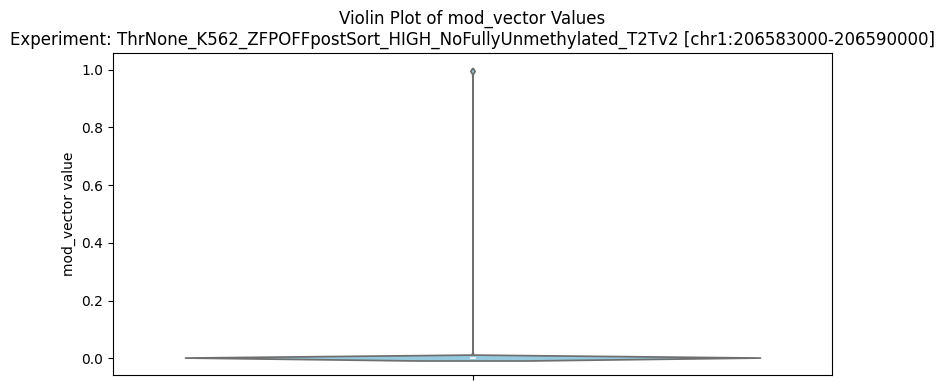

Bin 1: Range [0.0020, 0.0642) - Percentage: 22.74%
Bin 2: Range [0.0642, 0.1265) - Percentage: 2.51%
Bin 3: Range [0.1265, 0.1887) - Percentage: 1.57%
Bin 4: Range [0.1887, 0.2510) - Percentage: 1.23%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.07%
Bin 6: Range [0.3132, 0.3755) - Percentage: 0.96%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.00%
Bin 8: Range [0.4377, 0.5000) - Percentage: 0.99%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.04%
Bin 10: Range [0.5625, 0.6245) - Percentage: 1.11%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.26%
Bin 12: Range [0.6865, 0.7490) - Percentage: 1.43%
Bin 13: Range [0.7490, 0.8115) - Percentage: 1.82%
Bin 14: Range [0.8115, 0.8735) - Percentage: 2.47%
Bin 15: Range [0.8735, 0.9355) - Percentage: 3.74%
Bin 16: Range [0.9355, 0.9980) - Percentage: 55.08%


([('chr1',
   array([0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.01758],
         dtype=float16),
   'CG,0',
   np.int32(206589935),
   '6fd10b78-0940-4b1d-8b60-1260eb7ac188',
   np.int32(206571880),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206583000,
   206590000,
   '.',
   np.float64(0.566)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.9707], dtype=float16),
   'CG,0',
   np.int32(206589893),
   'efa6559a-434f-4f40-81be-a3e38bc8cf7f',
   np.int32(206579757),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206583000,
   206590000,
   '.',
   np.float64(0.7615979381443299)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.4316], dtype=float16),
   'CG,0',
   np.int32(206589906),
   'd932aa25-8cb2-4840-8d00-4488cf06cbb5',
   np.int32(206582737),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206583000,
   206590000,
   '.',
   np.float64(0.7311320754716981)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype

In [12]:
# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)

extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

In [13]:
# if extract_file:
#     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#     visualize_data(reads_df)

#     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

keep_unmethylated_reads = False
if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

Error processing extracted reads: No threshold has been applied to this .h5 single read data. You must provide a threshold using the thresh parameter in order to extract binarized modification arrays.
Error in visualization: 'NoneType' object has no attribute 'copy'
Error creating padded reads matrix: 'NoneType' object is not subscriptable


region_length 30
Region length: 30
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_co…

          |    0%

          | Transferring 2563 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2563   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_30bps_ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206586162-206586192.html


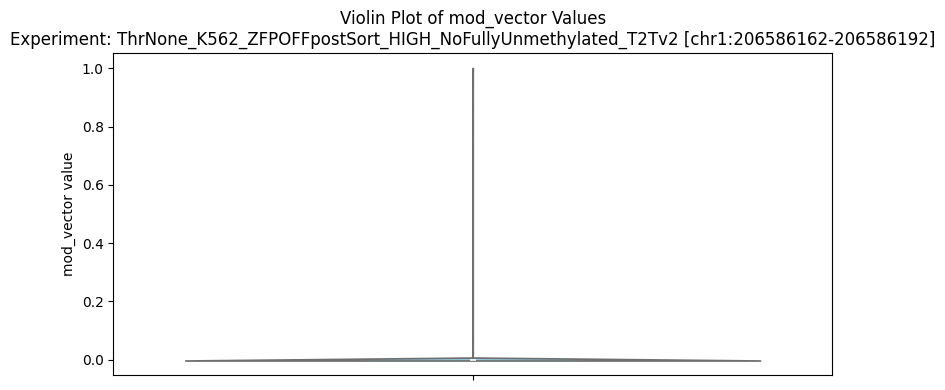

Bin 1: Range [0.0020, 0.0642) - Percentage: 25.69%
Bin 2: Range [0.0642, 0.1265) - Percentage: 3.85%
Bin 3: Range [0.1265, 0.1887) - Percentage: 2.34%
Bin 4: Range [0.1887, 0.2510) - Percentage: 1.93%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.74%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.42%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.50%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.39%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.45%
Bin 10: Range [0.5625, 0.6245) - Percentage: 1.71%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.67%
Bin 12: Range [0.6865, 0.7490) - Percentage: 2.00%
Bin 13: Range [0.7490, 0.8115) - Percentage: 2.23%
Bin 14: Range [0.8115, 0.8735) - Percentage: 2.99%
Bin 15: Range [0.8735, 0.9355) - Percentage: 4.36%
Bin 16: Range [0.9355, 0.9980) - Percentage: 43.72%


([('chr1',
   array([0.      , 0.      , 0.      , ..., 0.001953, 0.      , 0.001953],
         dtype=float16),
   'CG,0',
   np.int32(206589938),
   '6fd10b78-0940-4b1d-8b60-1260eb7ac188',
   np.int32(206571883),
   '-',
   array([0, 0, 0, ..., 1, 0, 1]),
   206586162,
   206586192,
   '.',
   np.float64(0.2592075892857143)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.7246, 0.    , 0.3848], dtype=float16),
   'CG,0',
   np.int32(206589907),
   'efa6559a-434f-4f40-81be-a3e38bc8cf7f',
   np.int32(206579771),
   '-',
   array([0, 0, 0, ..., 1, 0, 1]),
   206586162,
   206586192,
   '.',
   np.float64(0.49853515625)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.99 , 0.   , 0.998], dtype=float16),
   'CG,0',
   np.int32(206589905),
   'd932aa25-8cb2-4840-8d00-4488cf06cbb5',
   np.int32(206582736),
   '-',
   array([0, 0, 0, ..., 1, 0, 1]),
   206586162,
   206586192,
   '.',
   np.float64(0.5052083333333334)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.9395, 0.    , 

In [14]:
# threshold_mC = None # 0 # 0.7 # 0.9 #0.99

region_chr = 'chr1'
# 30 bps:
region_start = 206586162
region_end = 206586192

# # FULL 7 KB WINDOW: 1:206583000-206590000
# region_start = 206583000   # 206586162
# region_end = 206590000 # 20658619


region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

In [15]:
experiment_name

'ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2'

In [16]:
bam_path

'/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

Expend window size by 2 *  50
region_length 131
Region length: 131
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_co…

          |    0%

          | Transferring 2638 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2638   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_131bps_ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206586112-206586243.html


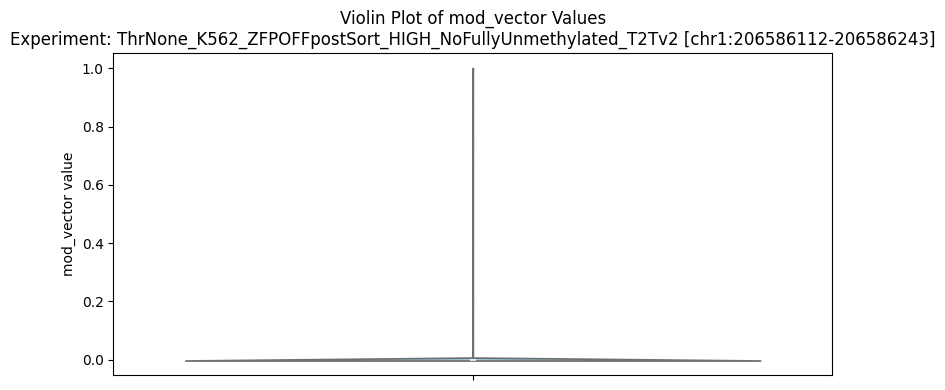

Bin 1: Range [0.0020, 0.0642) - Percentage: 30.65%
Bin 2: Range [0.0642, 0.1265) - Percentage: 4.13%
Bin 3: Range [0.1265, 0.1887) - Percentage: 2.32%
Bin 4: Range [0.1887, 0.2510) - Percentage: 1.87%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.62%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.39%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.39%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.21%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.31%
Bin 10: Range [0.5625, 0.6245) - Percentage: 1.53%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.46%
Bin 12: Range [0.6865, 0.7490) - Percentage: 1.74%
Bin 13: Range [0.7490, 0.8115) - Percentage: 1.97%
Bin 14: Range [0.8115, 0.8735) - Percentage: 2.61%
Bin 15: Range [0.8735, 0.9355) - Percentage: 3.77%
Bin 16: Range [0.9355, 0.9980) - Percentage: 41.03%


([('chr1',
   array([0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.01367],
         dtype=float16),
   'CG,0',
   np.int32(206589942),
   '6fd10b78-0940-4b1d-8b60-1260eb7ac188',
   np.int32(206571887),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.3118489583333333)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype=float16),
   'CG,0',
   np.int32(206589907),
   'efa6559a-434f-4f40-81be-a3e38bc8cf7f',
   np.int32(206579771),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.508203125)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype=float16),
   'CG,0',
   np.int32(206589905),
   'd932aa25-8cb2-4840-8d00-4488cf06cbb5',
   np.int32(206582736),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.5758928571428571)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.0332], dtype

In [17]:

# Expend window size
expand_window_size = 50 # 50 #500 #1500 # 0 
expand_window_size
print("Expend window size by 2 * ", expand_window_size)
region_start = 206586162 - expand_window_size
region_end = 206586192 + expand_window_size + 1


region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

In [18]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


Error loading padded reads: [Errno 2] No such file or directory: 'dimelo_v2_output/padded_reads_ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2_mCthreshNone_t2t_v2_0_chr1:206583000-206590000_2025-07-15.npy'
Error in process pipeline: [Errno 2] No such file or directory: 'dimelo_v2_output/padded_reads_ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2_mCthreshNone_t2t_v2_0_chr1:206583000-206590000_2025-07-15.npy'
Error in main pipeline (analize_forward_reverse_CGs_pipeline function): [Errno 2] No such file or directory: 'dimelo_v2_output/padded_reads_ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2_mCthreshNone_t2t_v2_0_chr1:206583000-206590000_2025-07-15.npy'


region_length 200
Region length: 200
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_co…

          |    0%

          | Transferring 2670 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2670   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_200bps_ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206586400-206586600.html


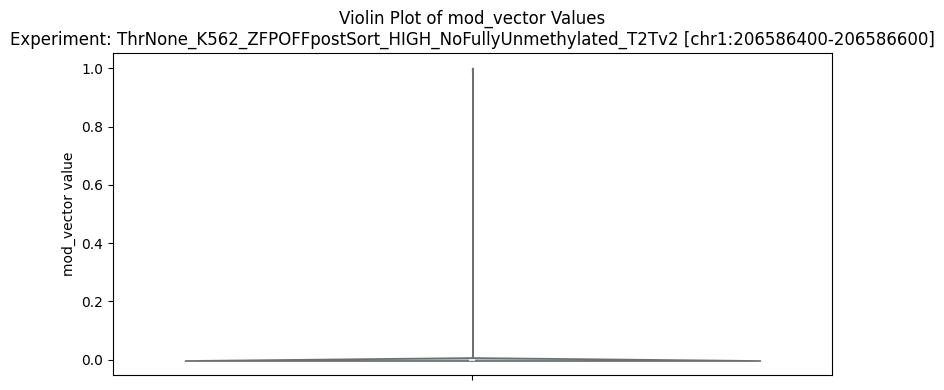

Bin 1: Range [0.0020, 0.0642) - Percentage: 33.15%
Bin 2: Range [0.0642, 0.1265) - Percentage: 2.98%
Bin 3: Range [0.1265, 0.1887) - Percentage: 1.90%
Bin 4: Range [0.1887, 0.2510) - Percentage: 1.46%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.17%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.06%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.07%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.00%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.08%
Bin 10: Range [0.5625, 0.6245) - Percentage: 1.18%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.22%
Bin 12: Range [0.6865, 0.7490) - Percentage: 1.35%
Bin 13: Range [0.7490, 0.8115) - Percentage: 1.76%
Bin 14: Range [0.8115, 0.8735) - Percentage: 2.66%
Bin 15: Range [0.8735, 0.9355) - Percentage: 3.54%
Bin 16: Range [0.9355, 0.9980) - Percentage: 43.42%


([('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.865], dtype=float16),
   'CG,0',
   np.int32(206589952),
   '6fd10b78-0940-4b1d-8b60-1260eb7ac188',
   np.int32(206571897),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586600,
   '.',
   np.float64(0.228515625)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.998], dtype=float16),
   'CG,0',
   np.int32(206589921),
   'efa6559a-434f-4f40-81be-a3e38bc8cf7f',
   np.int32(206579785),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586600,
   '.',
   np.float64(0.74375)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.994], dtype=float16),
   'CG,0',
   np.int32(206589925),
   'd932aa25-8cb2-4840-8d00-4488cf06cbb5',
   np.int32(206582756),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586600,
   '.',
   np.float64(0.538671875)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.994], dtype=float16),
   'CG,0',
   np.int32(206589852),

In [12]:
# 2065864-2065866
# FULL 7 KB WINDOW: 1:206583000-206590000
region_start = 206586400 # 206583000   # 206586162
region_end = 206586600 # 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

# K562 Unedited

/home/michalula/data/cas9_nanopore/data/20241127_Cas9_K562unedited_day2_R9_minion/post_seq_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241127_MR_Cas9_K562unedited_day2_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam

In [16]:
system_info()

experiment_name = "ThrNone_K562_UneditedDay2_NoFullyUnmethylated_T2Tv2" 

# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = '/home/michalula/data/cas9_nanopore/data/20241127_Cas9_K562unedited_day2_R9_minion/post_seq_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241127_MR_Cas9_K562unedited_day2_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# experiment_name = "ThrNone_CROFF90prD6_Tcells_ES_NoFullyUnmethylated_T2Tv2" 
# # threshold_mC = 0.9 # 0.75 # 0.99
# bam_path ="/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
#  "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")


System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]


In [20]:
# threshold_mC = None # 0 # 0.7 # 0.9 #0.99

extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name, 
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

Region length: 131
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241127_MR_Cas9_K562unedited_day2_R9min_convert…

          |    0%

          | Transferring 343 from reads.CG,0.txt into reads.combined_basemods.h5, new size 343   0% | 00:00<?

Plot browser html figure saved to dimelo_v2_output/plot_browser_131bps_ThrNone_K562_UneditedDay2_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206586112-206586243.html


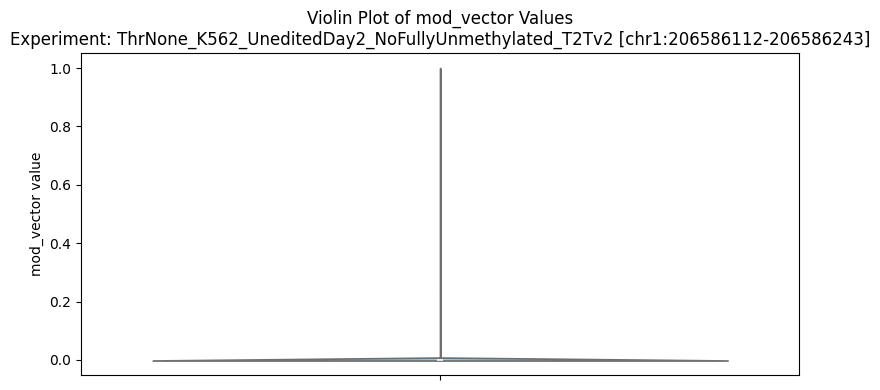

Bin 1: Range [0.0020, 0.0642) - Percentage: 66.58%
Bin 2: Range [0.0642, 0.1265) - Percentage: 7.09%
Bin 3: Range [0.1265, 0.1887) - Percentage: 4.28%
Bin 4: Range [0.1887, 0.2510) - Percentage: 2.61%
Bin 5: Range [0.2510, 0.3132) - Percentage: 2.27%
Bin 6: Range [0.3132, 0.3755) - Percentage: 2.34%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.26%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.29%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.43%
Bin 10: Range [0.5625, 0.6245) - Percentage: 1.12%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.39%
Bin 12: Range [0.6865, 0.7490) - Percentage: 0.88%
Bin 13: Range [0.7490, 0.8115) - Percentage: 1.36%
Bin 14: Range [0.8115, 0.8735) - Percentage: 0.92%
Bin 15: Range [0.8735, 0.9355) - Percentage: 1.22%
Bin 16: Range [0.9355, 0.9980) - Percentage: 3.97%


([('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.6816], dtype=float16),
   'CG,0',
   np.int32(206589905),
   '7fe89754-6dee-49f5-bd73-768e5ce91c0a',
   np.int32(206582599),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.8237847222222222)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.502, 0.   , 0.287], dtype=float16),
   'CG,0',
   np.int32(206590274),
   'd6019a9a-d70f-4567-bc16-7808d01b17bc',
   np.int32(206582922),
   '+',
   array([0, 0, 0, ..., 1, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.3696986607142857)),
  ('chr1',
   array([0.     , 0.     , 0.     , ..., 0.02148, 0.     , 0.0332 ],
         dtype=float16),
   'CG,0',
   np.int32(206590164),
   '1b21f22c-2e81-49ed-883f-c1e50c525d9d',
   np.int32(206582940),
   '+',
   array([0, 0, 0, ..., 1, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.15364583333333334)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 

In [21]:
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

Expend window size by 2 *  50
region_length 131
Region length: 131
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241127_MR_Cas9_K562unedited_day2_R9min_convert…

          |    0%

          | Transferring 343 from reads.CG,0.txt into reads.combined_basemods.h5, new size 343   0% | 00:00<?

Plot browser html figure saved to dimelo_v2_output/plot_browser_131bps_ThrNone_K562_UneditedDay2_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206586112-206586243.html


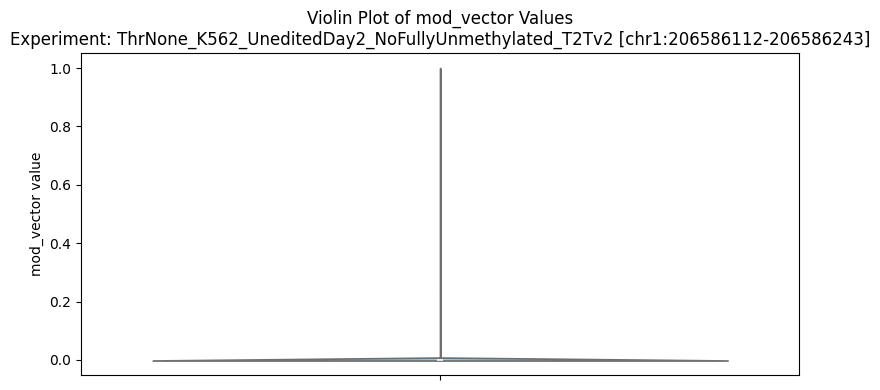

Bin 1: Range [0.0020, 0.0642) - Percentage: 66.58%
Bin 2: Range [0.0642, 0.1265) - Percentage: 7.09%
Bin 3: Range [0.1265, 0.1887) - Percentage: 4.28%
Bin 4: Range [0.1887, 0.2510) - Percentage: 2.61%
Bin 5: Range [0.2510, 0.3132) - Percentage: 2.27%
Bin 6: Range [0.3132, 0.3755) - Percentage: 2.34%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.26%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.29%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.43%
Bin 10: Range [0.5625, 0.6245) - Percentage: 1.12%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.39%
Bin 12: Range [0.6865, 0.7490) - Percentage: 0.88%
Bin 13: Range [0.7490, 0.8115) - Percentage: 1.36%
Bin 14: Range [0.8115, 0.8735) - Percentage: 0.92%
Bin 15: Range [0.8735, 0.9355) - Percentage: 1.22%
Bin 16: Range [0.9355, 0.9980) - Percentage: 3.97%


([('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.6816], dtype=float16),
   'CG,0',
   np.int32(206589905),
   '7fe89754-6dee-49f5-bd73-768e5ce91c0a',
   np.int32(206582599),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.8237847222222222)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.502, 0.   , 0.287], dtype=float16),
   'CG,0',
   np.int32(206590274),
   'd6019a9a-d70f-4567-bc16-7808d01b17bc',
   np.int32(206582922),
   '+',
   array([0, 0, 0, ..., 1, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.3696986607142857)),
  ('chr1',
   array([0.     , 0.     , 0.     , ..., 0.02148, 0.     , 0.0332 ],
         dtype=float16),
   'CG,0',
   np.int32(206590164),
   '1b21f22c-2e81-49ed-883f-c1e50c525d9d',
   np.int32(206582940),
   '+',
   array([0, 0, 0, ..., 1, 0, 1]),
   206586112,
   206586243,
   '.',
   np.float64(0.15364583333333334)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 

In [22]:

# Expend window size
expand_window_size = 50 # 50 #500 #1500 # 0 
expand_window_size
print("Expend window size by 2 * ", expand_window_size)
region_start = 206586162 - expand_window_size
region_end = 206586192 + expand_window_size + 1


region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

region_length 7000
Region length: 7000
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241127_MR_Cas9_K562unedited_day2_R9min_convert…

          |    0%

          | Transferring 361 from reads.CG,0.txt into reads.combined_basemods.h5, new size 361   0% | 00:00<?

Plot browser html figure saved to dimelo_v2_output/plot_browser_7000bps_ThrNone_K562_UneditedDay2_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206583000-206590000.html


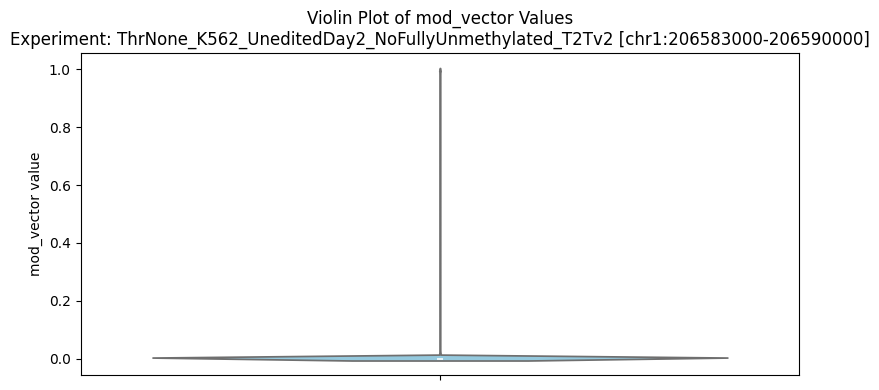

Bin 1: Range [0.0020, 0.0642) - Percentage: 60.17%
Bin 2: Range [0.0642, 0.1265) - Percentage: 6.06%
Bin 3: Range [0.1265, 0.1887) - Percentage: 3.35%
Bin 4: Range [0.1887, 0.2510) - Percentage: 2.31%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.72%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.41%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.35%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.18%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.09%
Bin 10: Range [0.5625, 0.6245) - Percentage: 0.98%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.03%
Bin 12: Range [0.6865, 0.7490) - Percentage: 1.03%
Bin 13: Range [0.7490, 0.8115) - Percentage: 1.08%
Bin 14: Range [0.8115, 0.8735) - Percentage: 1.23%
Bin 15: Range [0.8735, 0.9355) - Percentage: 1.40%
Bin 16: Range [0.9355, 0.9980) - Percentage: 14.62%


([('chr1',
   array([0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.74], dtype=float16),
   'CG,0',
   np.int32(206589877),
   '7fe89754-6dee-49f5-bd73-768e5ce91c0a',
   np.int32(206582571),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206583000,
   206590000,
   '.',
   np.float64(0.546239837398374)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.8184], dtype=float16),
   'CG,0',
   np.int32(206589894),
   '562bb8f6-c257-4f66-9ac6-8d402287060e',
   np.int32(206583029),
   '+',
   array([0, 0, 0, ..., 0, 0, 1]),
   206583000,
   206590000,
   '.',
   np.float64(0.2447509765625)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.9824], dtype=float16),
   'CG,0',
   np.int32(206589879),
   'db24102c-dada-4a7c-8c0a-c3faa0b5196d',
   np.int32(206583029),
   '+',
   array([0, 0, 0, ..., 0, 0, 1]),
   206583000,
   206590000,
   '.',
   np.float64(0.2567829457364341)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.967], dtype=float16),
   'CG,

In [23]:

# # 30 bps:
# region_start = 206586162
# region_end = 206586192


# # Expend window size
# expand_window_size = 50 # 50 #500 #1500 # 0 
# expand_window_size
# print("Expend window size by 2 * ", expand_window_size)
# region_start = 206586162 - expand_window_size
# region_end = 206586192 + expand_window_size + 1

# FULL 7 KB WINDOW: 1:206583000-206590000
region_start = 206583000   # 206586162
region_end = 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

In [2]:
206586400-206586600

-200

region_length 200
Region length: 200
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241127_MR_Cas9_K562unedited_day2_R9min_convert…

          |    0%

          | Transferring 343 from reads.CG,0.txt into reads.combined_basemods.h5, new size 343   0% | 00:00<?

Plot browser html figure saved to dimelo_v2_output/plot_browser_200bps_ThrNone_K562_UneditedDay2_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206586400-206586600.html


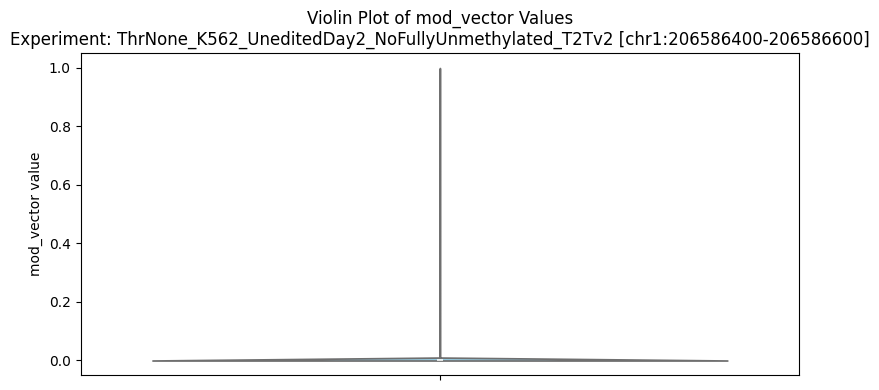

Bin 1: Range [0.0020, 0.0642) - Percentage: 73.62%
Bin 2: Range [0.0642, 0.1265) - Percentage: 6.56%
Bin 3: Range [0.1265, 0.1887) - Percentage: 4.02%
Bin 4: Range [0.1887, 0.2510) - Percentage: 2.74%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.43%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.31%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.40%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.14%
Bin 9: Range [0.5000, 0.5625) - Percentage: 0.91%
Bin 10: Range [0.5625, 0.6245) - Percentage: 0.94%
Bin 11: Range [0.6245, 0.6865) - Percentage: 0.80%
Bin 12: Range [0.6865, 0.7490) - Percentage: 0.88%
Bin 13: Range [0.7490, 0.8115) - Percentage: 0.91%
Bin 14: Range [0.8115, 0.8735) - Percentage: 1.08%
Bin 15: Range [0.8735, 0.9355) - Percentage: 0.83%
Bin 16: Range [0.9355, 0.9980) - Percentage: 1.43%


([('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.713], dtype=float16),
   'CG,0',
   np.int32(206589923),
   '7fe89754-6dee-49f5-bd73-768e5ce91c0a',
   np.int32(206582617),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586600,
   '.',
   np.float64(0.406640625)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.2051], dtype=float16),
   'CG,0',
   np.int32(206590112),
   '1b21f22c-2e81-49ed-883f-c1e50c525d9d',
   np.int32(206582888),
   '+',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586600,
   '.',
   np.float64(0.517578125)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.9746], dtype=float16),
   'CG,0',
   np.int32(206590287),
   'd6019a9a-d70f-4567-bc16-7808d01b17bc',
   np.int32(206582935),
   '+',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586600,
   '.',
   np.float64(0.369140625)),
  ('chr1',
   array([0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.01367],
         dtype=float16

In [10]:
# 2065864-2065866
# FULL 7 KB WINDOW: 1:206583000-206590000
region_start = 206586400 # 206583000   # 206586162
region_end = 206586600 # 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

region_length 200
Region length: 200
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3546 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3546   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_200bps_ThrNone_K562_ZFPOFFpostSort_LOW70_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206586400-206586600.html


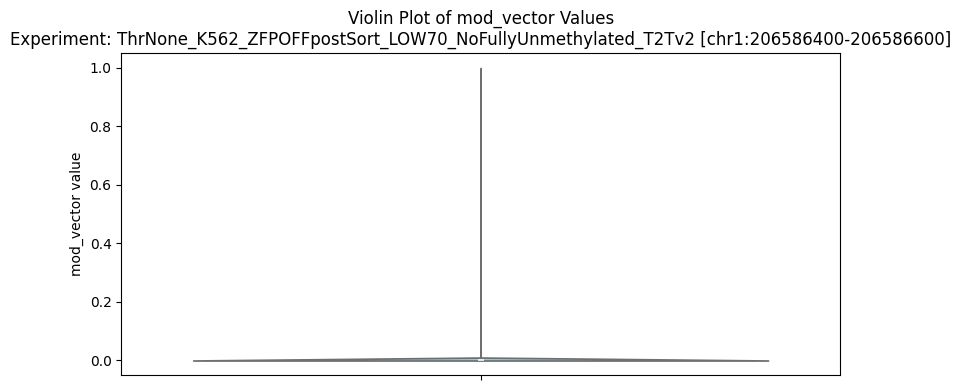

Bin 1: Range [0.0020, 0.0642) - Percentage: 75.08%
Bin 2: Range [0.0642, 0.1265) - Percentage: 5.42%
Bin 3: Range [0.1265, 0.1887) - Percentage: 2.88%
Bin 4: Range [0.1887, 0.2510) - Percentage: 1.95%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.55%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.27%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.18%
Bin 8: Range [0.4377, 0.5000) - Percentage: 0.94%
Bin 9: Range [0.5000, 0.5625) - Percentage: 0.85%
Bin 10: Range [0.5625, 0.6245) - Percentage: 0.87%
Bin 11: Range [0.6245, 0.6865) - Percentage: 0.79%
Bin 12: Range [0.6865, 0.7490) - Percentage: 0.75%
Bin 13: Range [0.7490, 0.8115) - Percentage: 0.78%
Bin 14: Range [0.8115, 0.8735) - Percentage: 0.86%
Bin 15: Range [0.8735, 0.9355) - Percentage: 1.00%
Bin 16: Range [0.9355, 0.9980) - Percentage: 3.85%


([('chr1',
   array([0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.01758],
         dtype=float16),
   'CG,0',
   np.int32(206589924),
   '3979a1bd-4ea5-4b90-a845-821d2b3299fa',
   np.int32(206567503),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586600,
   '.',
   np.float64(0.03493923611111111)),
  ('chr1',
   array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.001953],
         dtype=float16),
   'CG,0',
   np.int32(206589947),
   'f666b89d-d6fa-4f70-8c2e-d1a92473309f',
   np.int32(206578381),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586600,
   '.',
   np.float64(0.013671875)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.9277], dtype=float16),
   'CG,0',
   np.int32(206589944),
   '559d43b3-295b-419d-bad5-ad58ecf02c7b',
   np.int32(206581119),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206586400,
   206586600,
   '.',
   np.float64(0.5485026041666666)),
  ('chr1',
   array([0.      , 0.      , 0.   

In [ ]:
# 2065864-2065866
region_start = 206586400 # 206583000   # 206586162
region_end = 206586600 # 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

region_length 2200
Region length: 2200
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_co…

          |    0%

          | Transferring 2732 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2732   0% | 00:00<…

Plot browser html figure saved to dimelo_v2_output/plot_browser_2200bps_ThrNone_K562_ZFPOFFpostSort_HIGH_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206585400-206587600.html


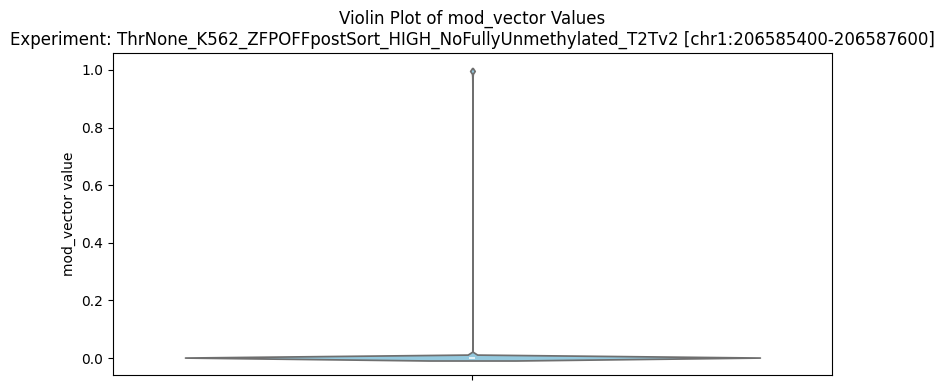

Bin 1: Range [0.0020, 0.0642) - Percentage: 22.93%
Bin 2: Range [0.0642, 0.1265) - Percentage: 2.72%
Bin 3: Range [0.1265, 0.1887) - Percentage: 1.72%
Bin 4: Range [0.1887, 0.2510) - Percentage: 1.34%
Bin 5: Range [0.2510, 0.3132) - Percentage: 1.14%
Bin 6: Range [0.3132, 0.3755) - Percentage: 1.03%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.09%
Bin 8: Range [0.4377, 0.5000) - Percentage: 1.06%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.10%
Bin 10: Range [0.5625, 0.6245) - Percentage: 1.19%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.35%
Bin 12: Range [0.6865, 0.7490) - Percentage: 1.51%
Bin 13: Range [0.7490, 0.8115) - Percentage: 1.94%
Bin 14: Range [0.8115, 0.8735) - Percentage: 2.62%
Bin 15: Range [0.8735, 0.9355) - Percentage: 3.87%
Bin 16: Range [0.9355, 0.9980) - Percentage: 53.38%


([('chr1',
   array([0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.02148],
         dtype=float16),
   'CG,0',
   np.int32(206589941),
   '6fd10b78-0940-4b1d-8b60-1260eb7ac188',
   np.int32(206571886),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206585400,
   206587600,
   '.',
   np.float64(0.5751329787234043)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.865], dtype=float16),
   'CG,0',
   np.int32(206589907),
   'efa6559a-434f-4f40-81be-a3e38bc8cf7f',
   np.int32(206579771),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206585400,
   206587600,
   '.',
   np.float64(0.775390625)),
  ('chr1',
   array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.001953],
         dtype=float16),
   'CG,0',
   np.int32(206589904),
   'd932aa25-8cb2-4840-8d00-4488cf06cbb5',
   np.int32(206582735),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206585400,
   206587600,
   '.',
   np.float64(0.7512019230769231)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   ,

In [13]:
# Region length: 2200
region_start = 206585400 # 206583000   # 206586162
region_end = 206587600 # 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )

In [21]:
206584416 - 206584100

316

region_length 316
Region length: 316
No specified number of cores requested. 24 available on machine, allocating all.
No valid base modification threshold provided. Raw probs will be saved.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241127_MR_Cas9_K562unedited_day2_R9min_convert…

          |    0%

          | Transferring 345 from reads.CG,0.txt into reads.combined_basemods.h5, new size 345   0% | 00:00<?

Plot browser html figure saved to dimelo_v2_output/plot_browser_316bps_ThrNone_K562_UneditedDay2_NoFullyUnmethylated_T2Tv2_extract_reads_chr1:206584100-206584416.html


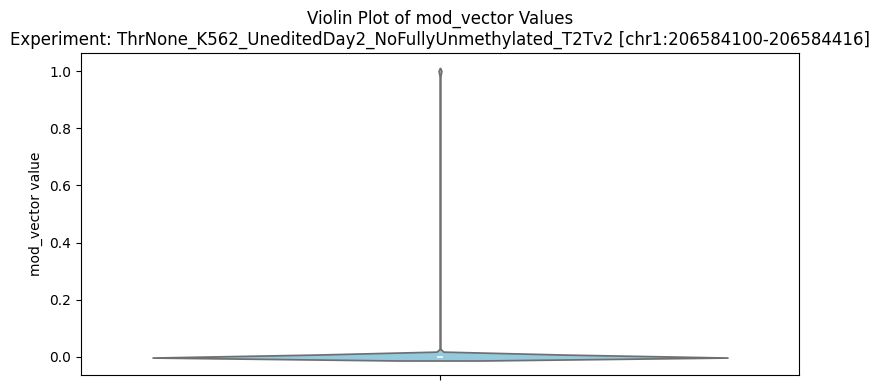

Bin 1: Range [0.0020, 0.0642) - Percentage: 10.57%
Bin 2: Range [0.0642, 0.1265) - Percentage: 1.08%
Bin 3: Range [0.1265, 0.1887) - Percentage: 1.08%
Bin 4: Range [0.1887, 0.2510) - Percentage: 0.85%
Bin 5: Range [0.2510, 0.3132) - Percentage: 0.62%
Bin 6: Range [0.3132, 0.3755) - Percentage: 0.51%
Bin 7: Range [0.3755, 0.4377) - Percentage: 1.05%
Bin 8: Range [0.4377, 0.5000) - Percentage: 0.90%
Bin 9: Range [0.5000, 0.5625) - Percentage: 1.23%
Bin 10: Range [0.5625, 0.6245) - Percentage: 0.95%
Bin 11: Range [0.6245, 0.6865) - Percentage: 1.26%
Bin 12: Range [0.6865, 0.7490) - Percentage: 1.75%
Bin 13: Range [0.7490, 0.8115) - Percentage: 1.72%
Bin 14: Range [0.8115, 0.8735) - Percentage: 2.26%
Bin 15: Range [0.8735, 0.9355) - Percentage: 4.37%
Bin 16: Range [0.9355, 0.9980) - Percentage: 69.79%


([('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.2988], dtype=float16),
   'CG,0',
   np.int32(206589881),
   '7fe89754-6dee-49f5-bd73-768e5ce91c0a',
   np.int32(206582575),
   '-',
   array([0, 0, 0, ..., 0, 0, 1]),
   206584100,
   206584416,
   '.',
   np.float64(0.7317708333333334)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.412], dtype=float16),
   'CG,0',
   np.int32(206589904),
   '87b77c7f-b1f5-45b5-829f-cc08c6a5313f',
   np.int32(206583027),
   '+',
   array([0, 0, 0, ..., 0, 0, 1]),
   206584100,
   206584416,
   '.',
   np.float64(0.8151041666666666)),
  ('chr1',
   array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.9707], dtype=float16),
   'CG,0',
   np.int32(206589878),
   'db24102c-dada-4a7c-8c0a-c3faa0b5196d',
   np.int32(206583028),
   '+',
   array([0, 0, 0, ..., 0, 0, 1]),
   206584100,
   206584416,
   '.',
   np.float64(0.7864583333333334)),
  ('chr1',
   array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.994], dtype=float16

In [22]:
# Highly methylated:

# Region length: 316
region_start = 206584100 # 206583000   # 206586162
region_end = 206584416 # 206587600 # 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


extract_file, extract_regions, fig_plot_browser = extract_from_bam(
    experiment_name=experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
mod_vectors_noThreshold_analyze(
    experiment_name,
    extract_file, # bam_path,
    region_str,
    motifs
    )